Донат Шергалис, 3530903/70301  
Вариант: 39

Считать данные файла c помощью языка python и среды разработки Jupyter и выполнить следующие действия:
- Найти среднее и дисперсию каждого столбца.
- Визуализировать датасет любым удобным способом. Можно несколькими графиками.
- Построить графики для каждой пары признаков в наборе данных.
- Построить гистограмму каждого из признаков.
- Найти выбросы. Удалить их.
     Если номер варианта четный - удалить всю строку данных из выборки.
     Если номер варианта не четный - присвоить выбросам среднее значение.
- Найти новые средние и дисперсии, сравнить со старыми.
- Нормализовать данные по среднему и дисперсии.

При сдаче данного задания в первую очередь будет проверяться код и решения, которые вы выбрали для реализации.
Схожие решения в большом количестве пунктов будут приняты за списывание с выдачей нового, другого, дополнительного задания.
Лучше просто не подглядывайте к коллегам.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
inp = pd.read_pickle('data/var39.pkl')
type(inp)

dict

In [3]:
data = pd.DataFrame.from_dict(inp)
data.head()

,dgjwh,aaweh,ycmjp
0,15.577687,14.090571,7.114333
1,19.904222,8.546078,22.747730
2,-125.721670,15.059860,14.053320
3,17.347532,14.077212,6.468136
4,15.357031,17.538997,10.946368


### Найти среднее и дисперсию каждого столбца.

In [4]:
def round2(num):
    return np.round(num, 2)

def get_avg_var(column):
    avg = np.average(column)
    var = np.var(column)
    return avg, var

def show_avg_var(data):
    for colname in data.columns:
        avg, var = get_avg_var(data[colname])
        print(f"\tстолбец {colname}:\t среднее: {round2(avg)}\t дисперсия: {round2(var)}")

show_avg_var(data)

	столбец dgjwh:	 среднее: 10.61	 дисперсия: 546.39
	столбец aaweh:	 среднее: 12.25	 дисперсия: 261.33
	столбец ycmjp:	 среднее: 12.0	 дисперсия: 509.75


### Визуализировать датасет любым удобным способом. Можно несколькими графиками.

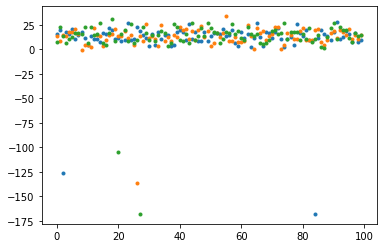

In [5]:
plt.plot(data, '.')

In [6]:
def demonstrate_data(data):
    fig, ax = plt.subplots(figsize=(20,10))
    for colname in data:
        ax.plot(data[colname], '.')
    ax.legend(data.columns)

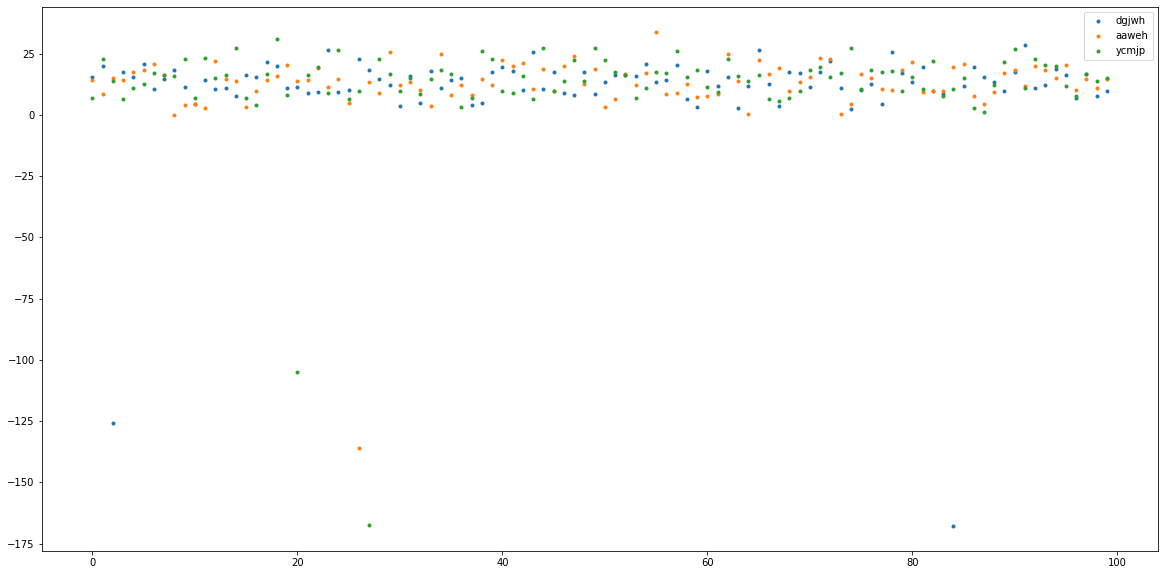

In [7]:
demonstrate_data(data)

In [8]:
def demonstrate_columns(data):
    fig, axes = plt.subplots(ncols = len(data.columns), figsize=(20,5))
    for i, colname in enumerate(data.columns):
        axes[i].set_title(colname)
        axes[i].set_xticks([])
        axes[i].plot(data[colname], '.')

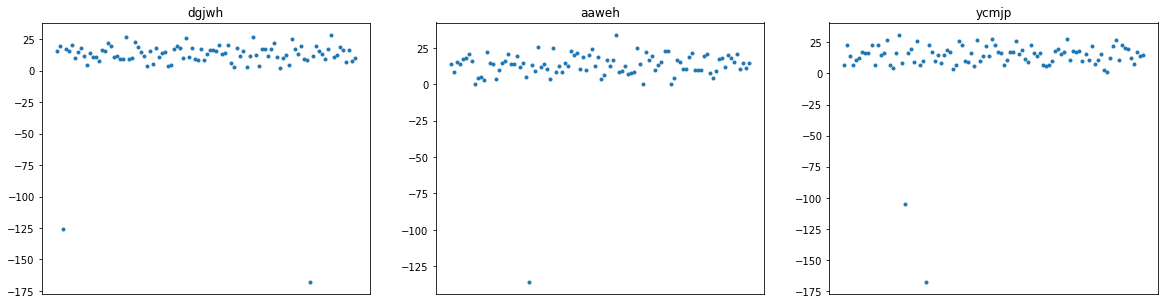

In [9]:
demonstrate_columns(data)

### Построить графики для каждой пары признаков в наборе данных.

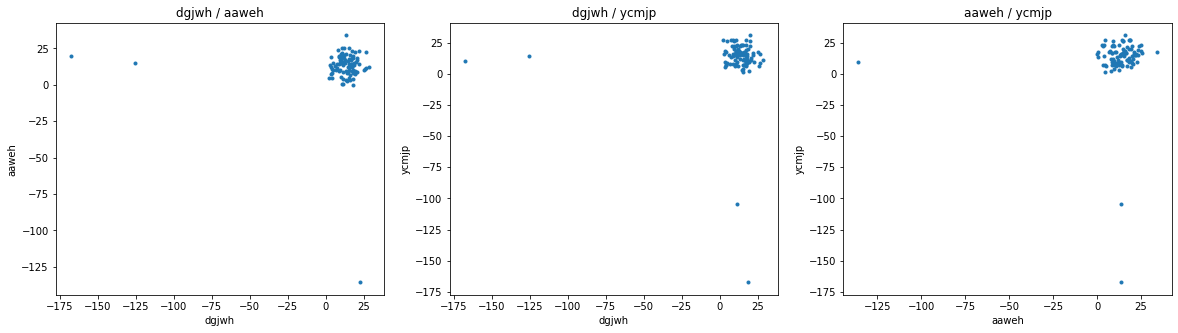

In [10]:
def draw_combinations(data):
    colcount = len(data.columns)
    pairs = list(itertools.combinations(data.columns, 2))
    fig, axes = plt.subplots(ncols = len(pairs), figsize=(20,5))
    for i, (col1, col2) in enumerate(pairs):
        ax = axes[i]
        ax.set_title(col1 + " / " + col2)
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.plot(data[col1], data[col2], '.')

draw_combinations(data)

### Построить гистограмму каждого из признаков.

In [11]:
def draw_hists(data):
    fig, axes = plt.subplots(ncols = len(data.columns), figsize=(20,5))
    for i, colname in enumerate(data.columns):
        axes[i].set_title(colname)
        axes[i].hist(data[colname], 100)

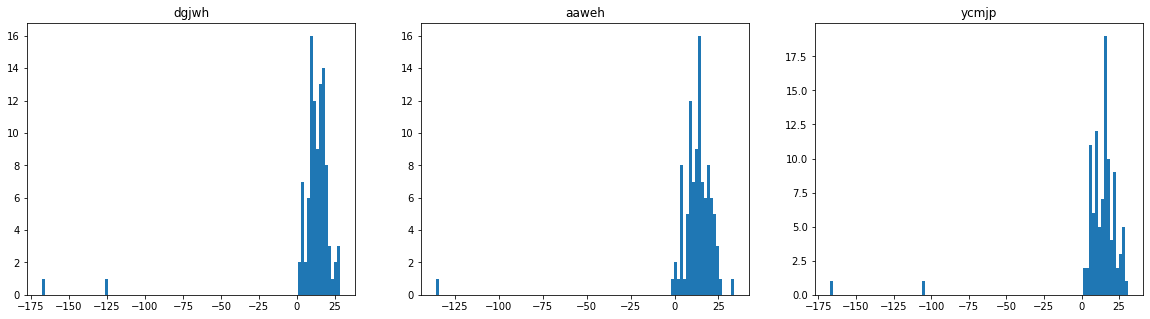

In [12]:
draw_hists(data)

### Найти выбросы. Удалить их. Если номер варианта четный - удалить всю строку данных из выборки. Если номер варианта не четный - присвоить выбросам среднее значение.

In [13]:
clean_data = data.copy()
for colname in clean_data.columns:
    print(colname + ":")
    col = clean_data[colname]
    avg, var = get_avg_var(col)
    sd = np.sqrt(var)
    for i in range(len(col)):
        if (np.abs(col[i] - avg) > sd):
            print(f"\t{np.round(col[i], 2)}\t-> {avg}")
            col[i] = avg # вариант нечётный

dgjwh:
	-125.72	-> 10.6087388586702
	-167.87	-> 10.6087388586702
aaweh:
	-135.81	-> 12.254383266433123
	33.91	-> 12.254383266433123
ycmjp:
	-104.83	-> 11.999313056492742
	-167.49	-> 11.999313056492742


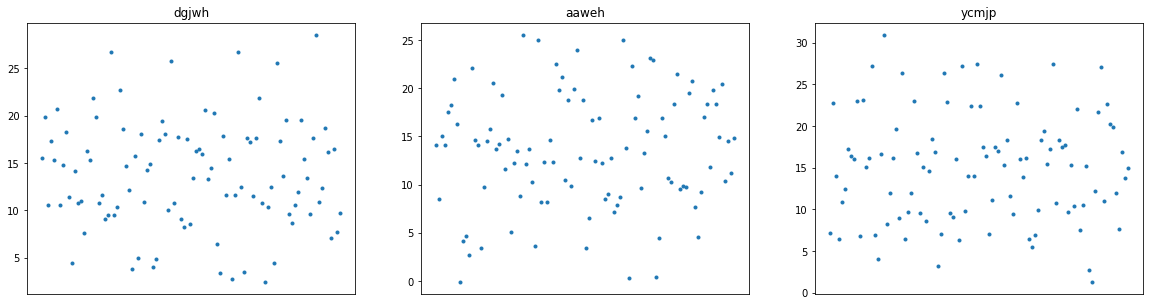

In [14]:
demonstrate_columns(clean_data)

### Найти новые средние и дисперсии, сравнить со старыми.

In [15]:
print("Исходные данные:")
show_avg_var(data)

print("\nПосле удаления выбросов:")
show_avg_var(clean_data)

Исходные данные:
	столбец dgjwh:	 среднее: 10.61	 дисперсия: 546.39
	столбец aaweh:	 среднее: 12.25	 дисперсия: 261.33
	столбец ycmjp:	 среднее: 12.0	 дисперсия: 509.75

После удаления выбросов:
	столбец dgjwh:	 среднее: 13.76	 дисперсия: 32.07
	столбец aaweh:	 среднее: 13.52	 дисперсия: 35.8
	столбец ycmjp:	 среднее: 14.96	 дисперсия: 42.31


### Нормализовать данные по среднему и дисперсии.

In [16]:
norm_data = clean_data.copy()
for colname in norm_data.columns:
    col = norm_data[colname]
    avg, var = get_avg_var(col)
    sd = np.sqrt(var)
    for i, value in enumerate(col):
        col[i] = (value - avg) / sd

In [17]:
print("Результат нормализации:")
show_avg_var(norm_data)

Результат нормализации:
	столбец dgjwh:	 среднее: 0.0	 дисперсия: 1.0
	столбец aaweh:	 среднее: -0.0	 дисперсия: 1.0
	столбец ycmjp:	 среднее: -0.0	 дисперсия: 1.0


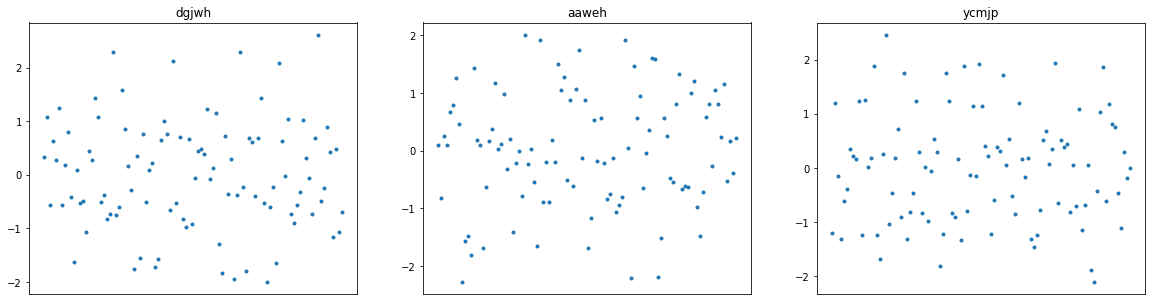

In [18]:
demonstrate_columns(norm_data)